In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content"))

# Any results you write to the current directory are saved as output.

['.config', 'sample_data']


In [ ]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset = pd.read_csv('/content/bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


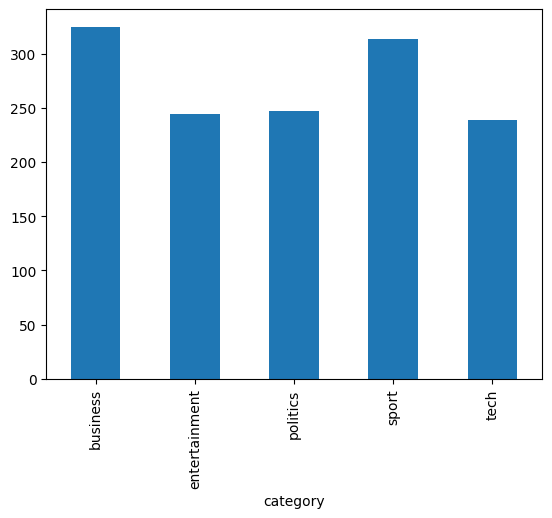

In [ ]:
dataset.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset.head()

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

(1369, 17225)

In [ ]:
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))



               precision    recall  f1-score   support

     business       0.96      0.97      0.97        79
entertainment       1.00      0.98      0.99        64
     politics       0.98      0.98      0.98        60
        sport       0.97      0.99      0.98        78
         tech       0.95      0.94      0.94        62

     accuracy                           0.97       343
    macro avg       0.97      0.97      0.97       343
 weighted avg       0.97      0.97      0.97       343

[[77  0  0  0  2]
 [ 0 63  1  0  0]
 [ 0  0 59  0  1]
 [ 1  0  0 77  0]
 [ 2  0  0  2 58]]
